In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
# import cost of living csv
coli_df = pd.read_csv("coli_composite.csv")
coli_df.head()

,Urban Area,State,COLI Composite
0,Anniston-CalhounCounty,AL,87.4
1,Auburn-Opelika,AL,92.3
2,Birmingham,AL,91.2
3,Decatur-Hartselle,AL,85.1
4,Dothan,AL,87.0


In [3]:
# import median rent per square feet by city (zillow)
mrsqft_df = pd.read_csv("median_rents_sqft.csv")
mrsqft_df.head()

,Region Name,State,2018-01
0,New York,NY,1.542
1,Los Angeles,CA,1.956
2,Chicago,IL,1.178
3,Dallas,TX,0.926
4,Philadelphia,PA,1.040


In [4]:
# import median property value per square feet by city (zillow)
mvsqft_df = pd.read_csv("median_value_sqft.csv")
mvsqft_df.head()

,Region Name,State,2018-01
0,New York,NY,255
1,Los Angeles,CA,423
2,Chicago,IL,142
3,Dallas,TX,118
4,Philadelphia,PA,140


In [5]:
# import office build out costs per city (JLL)
office_boc_sqft = pd.read_csv("office_boc_sqft.csv")
office_boc_sqft.head()

,City/Region,State,BOC_Sqft
0,Atlanta,GA,128.83
1,Austin,TX,141.22
2,Boston,MA,156.92
3,Chicago,IL,174.70
4,Columbus,OH,150.06


In [6]:
# import hq2 city list
city_list = pd.read_csv("amazon_hq2_finalists.csv")
city_list.head()

,City/Region,State
0,Atlanta,GA
1,Austin,TX
2,Boston,MA
3,Chicago,IL
4,Columbus,OH


In [7]:
# merging residential real estate costs, office real estate costs, and cost of living data part 1
new_df = pd.merge(city_list, mvsqft_df,  how='left', left_on=['City/Region','State'], right_on = ['Region Name','State'])
del new_df['Region Name']
new_df.columns = ['Region', 'State', 'Median Value / Sqft']
new_df = pd.merge(new_df, mrsqft_df,  how='left', left_on=['Region','State'], right_on = ['Region Name','State'])
del new_df['Region Name']
new_df.columns = ['Region', 'State', 'Median Value / Sqft', 'Median Rent / Sqft']

In [8]:
# merging residential real estate costs, office real estate costs, and cost of living data part 2
merged_df = pd.merge(new_df, coli_df,  how='left', left_on=['Region','State'], right_on = ['Urban Area','State'])
merged_df = pd.merge(merged_df, office_boc_sqft, how='left', left_on=['Region','State'], right_on = ['City/Region','State'])
del merged_df['Urban Area']
del merged_df['City/Region']
merged_df

,Region,State,Median Value / Sqft,Median Rent / Sqft,COLI Composite,BOC_Sqft
0,Atlanta,GA,103,0.782,98.8,128.83
1,Austin,TX,151,0.988,97.3,141.22
2,Boston,MA,271,1.514,147.9,156.92
3,Chicago,IL,142,1.178,123.4,174.70
4,Columbus,OH,114,0.892,89.6,150.06
5,Dallas,TX,118,0.926,101.9,138.00
6,Denver,CO,248,1.382,111.8,143.10
7,Indianapolis,IN,88,0.760,92.4,167.89
8,Los Angeles,CA,423,1.956,147.8,130.68
9,Miami,FL,176,1.382,114.4,140.40


In [9]:
# set variables and rank median house value data
mv_max = max(merged_df['Median Value / Sqft'])
mv_min = min(merged_df['Median Value / Sqft'])
mv_range = mv_max - mv_min
merged_df['mv_score'] = 2.0

for index, row in merged_df.iterrows():
    score = (abs(row['Median Value / Sqft'] - mv_max))/mv_range*10
    score = round(score, 1)
    merged_df.set_value(index, 'mv_score', score)

# set variables and rank median rent data
mr_max = max(merged_df['Median Rent / Sqft'])
mr_min = min(merged_df['Median Rent / Sqft'])
mr_range = mr_max - mr_min
merged_df['mr_score'] = 2.0

for index, row in merged_df.iterrows():
    score = (abs(row['Median Rent / Sqft'] - mr_max))/mr_range*10
    score = round(score, 1)
    merged_df.set_value(index, 'mr_score', score)

# set variables and rank coli data
coli_max = max(merged_df['COLI Composite'])
coli_min = min(merged_df['COLI Composite'])
coli_range = coli_max - coli_min
merged_df['coli_score'] = 2.0

for index, row in merged_df.iterrows():
    score = (abs(row['COLI Composite'] - coli_max))/coli_range*10
    score = round(score, 1)
    merged_df.set_value(index, 'coli_score', score)

# set variables and rank boc data
boc_max = max(merged_df['BOC_Sqft'])
boc_min = min(merged_df['BOC_Sqft'])
boc_range = boc_max - boc_min
merged_df['boc_score'] = 2.0

for index, row in merged_df.iterrows():
    score = (abs(row['BOC_Sqft'] - boc_max))/boc_range*10
    score = round(score, 1)
    merged_df.set_value(index, 'boc_score', score)

merged_df['RE & COL Score'] = (merged_df['mv_score']+merged_df['mr_score']+merged_df['coli_score']+merged_df['boc_score'])/4
merged_df['RE & COL Score'] = round(merged_df['RE & COL Score'], 2)
merged_df.sort_values('RE & COL Score', ascending=False)

,Region,State,Median Value / Sqft,Median Rent / Sqft,COLI Composite,BOC_Sqft,mv_score,mr_score,coli_score,boc_score,RE & COL Score
0,Atlanta,GA,103,0.782,98.8,128.83,9.6,9.8,9.1,6.7,8.80
17,Raleigh,NC,129,0.808,96.2,134.07,8.8,9.6,9.3,6.0,8.43
4,Columbus,OH,114,0.892,89.6,150.06,9.2,8.9,10.0,3.9,8.00
5,Dallas,TX,118,0.926,101.9,138.00,9.1,8.6,8.8,5.5,8.00
7,Indianapolis,IN,88,0.760,92.4,167.89,10.0,10.0,9.7,1.5,7.80
11,Nashville,TN,137,0.920,96.6,148.06,8.5,8.7,9.3,4.1,7.65
16,Pittsburgh,PA,103,0.832,99.4,160.17,9.6,9.4,9.0,2.5,7.62
1,Austin,TX,151,0.988,97.3,141.22,8.1,8.1,9.2,5.0,7.60
15,Philadelphia,PA,140,1.040,117.0,156.85,8.4,7.7,7.2,3.0,6.58
9,Miami,FL,176,1.382,114.4,140.40,7.4,4.8,7.5,5.1,6.20


In [10]:
# import education statistics from National Center for Education Statistics
edu_stats_df = pd.read_csv("education_statistics.csv")
edu_stats_df = edu_stats_df[['State Abb', 'Total']]
edu_stats_df = pd.merge(city_list, edu_stats_df, how='left', left_on=['State'], right_on = ['State Abb'])
del edu_stats_df['State Abb']

# set variables for ranking data
edu_max = max(edu_stats_df['Total'])
edu_min = min(edu_stats_df['Total'])
edu_range = edu_max - edu_min
edu_stats_df['Workforce Talent Score'] = 2.0

# loop through and create degree score
for index, row in edu_stats_df.iterrows():
    score = (row['Total'] - edu_min)/edu_range*10
    score = round(score, 1)
    edu_stats_df.set_value(index, 'Workforce Talent Score', score)
    
edu_stats_df.sort_values('Workforce Talent Score', ascending=False)

,City/Region,State,Total,Workforce Talent Score
8,Los Angeles,CA,226411.0,10.0
13,New York,NY,169040.0,7.3
5,Dallas,TX,153102.0,6.5
1,Austin,TX,153102.0,6.5
9,Miami,FL,124331.0,5.2
16,Pittsburgh,PA,117020.0,4.8
15,Philadelphia,PA,117020.0,4.8
3,Chicago,IL,107583.0,4.4
2,Boston,MA,84944.0,3.3
4,Columbus,OH,78498.0,3.0


In [11]:
# import camelot climate index from csv 
cci_df = pd.read_csv("camelot_climate_index.csv")
cci_df.head()

# attempt merge
cci_df_merged = pd.merge(city_list, cci_df, how='left', left_on=['City/Region'], right_on = ['City'])
cci_df_merged = cci_df_merged[['City/Region', 'State_x', 'INDEX']]
cci_df_merged.columns = [['City', 'State', 'Camelot Index']]
cci_df_merged

,City,State,Camelot Index
0,Atlanta,GA,70
1,Austin,TX,66
2,Boston,MA,68
3,Chicago,IL,63
4,Columbus,OH,63
5,Dallas,TX,66
6,Denver,CO,67
7,Indianapolis,IN,64
8,Los Angeles,CA,86
9,Miami,FL,70


In [12]:
# import modules for api request using google places api
import requests
import json
from config_jake import api_key

In [13]:
# run google place api to retrieve distances from Seattle - current HQ2 location
url = "https://maps.googleapis.com/maps/api/distancematrix/json?"
cci_df_merged['Dist From Seattle'] = ''

for index, row in cci_df_merged.iterrows():
    params={"units": "metric", "key": api_key, "origins": "Seattle,Washington", "destinations": f"{row[0]},{row[1]}"}
    response = requests.get(url, params=params).json()
    print(f'Loading {row[0]}')
    cci_df_merged.set_value(index, 'Dist From Seattle', response['rows'][0]['elements'][0]['distance']['value'])

# set variables and rank camelot data
cam_max = max(cci_df_merged['Camelot Index'])
cam_min = min(cci_df_merged['Camelot Index'])
cam_range = cam_max - cam_min
cci_df_merged['cam_score'] = 2.0

for index, row in cci_df_merged.iterrows():
    score = (abs(row['Camelot Index'] - cam_min))/cam_range*10
    score = round(score, 1)
    cci_df_merged.set_value(index, 'cam_score', score)


# set variables and rank boc data
dist_max = max(cci_df_merged['Dist From Seattle'])
dist_min = min(cci_df_merged['Dist From Seattle'])
dist_range = dist_max - dist_min
cci_df_merged['dist_score'] = 2.0

for index, row in cci_df_merged.iterrows():
    score = (abs(row['Dist From Seattle'] - dist_min))/dist_range*10
    score = round(score, 1)
    cci_df_merged.set_value(index, 'dist_score', score)

cci_df_merged['Geo Score'] = ((cci_df_merged['cam_score']*0.25)+(cci_df_merged['dist_score']*0.75))
cci_df_merged['Geo Score'] = round(cci_df_merged['Geo Score'], 2)
cci_df_merged.sort_values('Geo Score', ascending=False)

Loading Atlanta
Loading Austin
Loading Boston
Loading Chicago
Loading Columbus
Loading Dallas
Loading Denver
Loading Indianapolis
Loading Los Angeles
Loading Miami
Loading Montgomery County
Loading Nashville
Loading Newark
Loading New York
Loading Northern Virginia
Loading Philadelphia
Loading Pittsburgh
Loading Raleigh
Loading Washington


,City,State,Camelot Index,Dist From Seattle,cam_score,dist_score,Geo Score
9,Miami,FL,70,5305912,3.3,10.0,8.32
2,Boston,MA,68,4901388,2.5,8.8,7.22
12,Newark,NJ,68,4574275,2.5,7.9,6.55
13,New York,NY,68,4589638,2.5,7.9,6.55
17,Raleigh,NC,67,4625137,2.1,8.0,6.52
15,Philadelphia,PA,67,4539871,2.1,7.8,6.38
14,Northern Virginia,VA,68,4451464,2.5,7.5,6.25
18,Washington,DC,68,4446852,2.5,7.5,6.25
10,Montgomery County,MD,68,4406691,2.5,7.4,6.18
0,Atlanta,GA,70,4240549,3.3,6.9,6.00


In [14]:
merge1 = pd.merge(city_list, merged_df[['Region', 'RE & COL Score']], how='left', left_on=['City/Region'], right_on=['Region'])
merge2 = pd.merge(merge1, edu_stats_df[['City/Region', 'Workforce Talent Score']], how='left', left_on=['City/Region'], right_on=['City/Region'])
merge3 = pd.merge(merge2, cci_df_merged[['City', 'Geo Score']], how='left', left_on=['City/Region'], right_on=['City'])
del merge3['Region']
del merge3['City']
del merge3['Workforce Talent Score']
merge3

,City/Region,State,RE & COL Score,Geo Score
0,Atlanta,GA,8.80,6.00
1,Austin,TX,7.60,3.87
2,Boston,MA,3.82,7.22
3,Chicago,IL,5.52,3.32
4,Columbus,OH,8.00,4.53
5,Dallas,TX,8.00,3.80
6,Denver,CO,5.65,1.12
7,Indianapolis,IN,7.80,4.02
8,Los Angeles,CA,2.65,2.50
9,Miami,FL,6.20,8.32


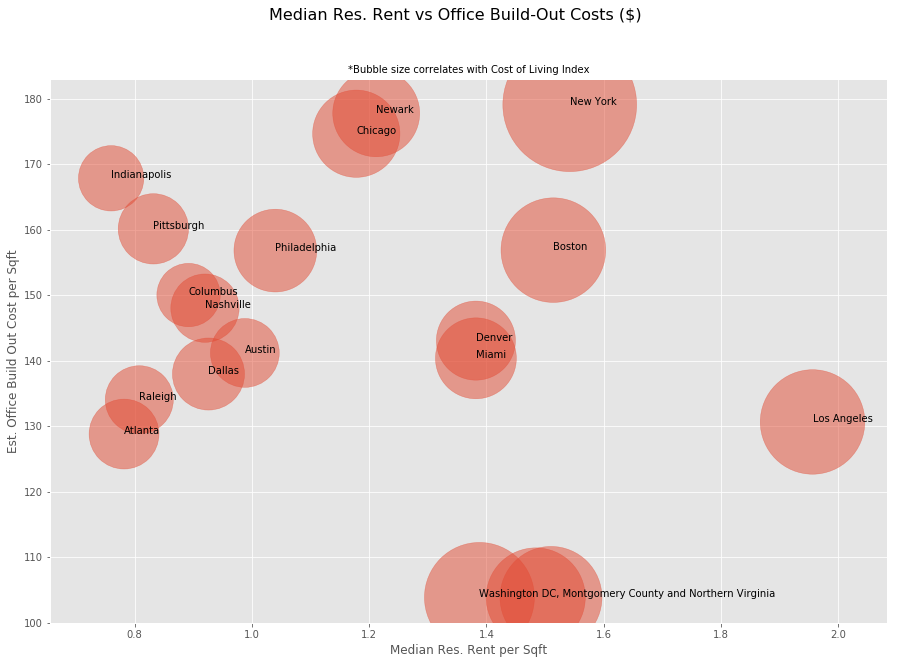

In [69]:
# plotting home values vs
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(merged_df['Median Rent / Sqft'], merged_df['BOC_Sqft'], s=merged_df['COLI Composite']*merged_df['COLI Composite']/2, alpha=0.5)
for i, txt in enumerate(merged_df['Region']):
    if i == 10:
        ax.annotate('', (merged_df['Median Rent / Sqft'][i], merged_df['BOC_Sqft'][i]))
    elif i == 14:
        ax.annotate('', (merged_df['Median Rent / Sqft'][i], merged_df['BOC_Sqft'][i]))
    elif i == 18:
        ax.annotate('Washington DC, Montgomery County and Northern Virginia', (merged_df['Median Rent / Sqft'][i], merged_df['BOC_Sqft'][i]))
    else:
        ax.annotate(txt, (merged_df['Median Rent / Sqft'][i], merged_df['BOC_Sqft'][i]))    
plt.suptitle('Median Res. Rent vs Office Build-Out Costs ($)', fontsize=16)
plt.title('*Bubble size correlates with Cost of Living Index', fontsize=10)
plt.xlabel('Median Res. Rent per Sqft')
plt.ylabel('Est. Office Build Out Cost per Sqft')
plt.show()